### **Dopasowanie modelu do danych** metodą najmniejszych kwadratów (ang. *least-squares method*)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

**Zbiór danych** (ang. *dataset*) został opracowany na podstawie: <br>
[Eurostat](https://ec.europa.eu/eurostat/data/database), [World Happiness Report](https://worldhappiness.report/) <br>
Dla każdego państwa w Europie zestawiamy dwa rodzaje pomiarów/cech (ang. *features*): PKB na osobę i poczucie szczęścia obywatela.

In [5]:
import urllib.request
import os

plik = 'GDP_happiness.csv'
URL = "https://byes.pl/wp-content/uploads/datasets/" + plik
if not os.path.isfile(plik):
    print('Pobieram plik z ', URL)
    urllib.request.urlretrieve(URL, plik)
    print('Pobrano plik')
else:
    print(f'Plik {plik} już jest na dysku')

dane = pd.read_csv(plik, index_col=[0])   

display(dane)

Plik GDP_happiness.csv już jest na dysku


,GDP per capita,happiness
Belgium,133.0,6.864
Bulgaria,28.2,5.102
Czech Republic,67.4,6.911
Denmark,172.5,7.646
Germany,133.2,7.076
Estonia,68.1,6.022
Ireland,231.9,7.094
Greece,54.9,5.515
Spain,84.8,6.401
France,115.4,6.664


**Oczyszczanie danych** <br>
Dane dotyczące poczucia szczęścia pobierałem automatem z pliku i pdf i akurat Litwa została niepoprawnie odczytana. Brakujące dane zostaną uzupełnione średnią z pozostałych dostępnych pomiarów. <br>

In [6]:
dane = dane.fillna(dane.mean(axis=0))
dane.tail()

,GDP per capita,happiness
Montenegro,25.500000,5.546
Albania,15.300000,4.883
Serbia,21.200000,5.778
Turkey,26.400000,5.132
Latvia,104.476471,5.950


**Zastanów się**: w jaki inny sposób można leczyć objawowo zbiory zawierające brakujące wartości?

Ramka danych jest strukturą pośredniczącą między różnymi rodzajami źródeł danych a metodami przetwarzania/analizy danych. <br>
Z ramki zostaną wybrane dwie serie, wartości których trafią do osobnych tabel: 

In [7]:
X = dane['GDP per capita'].values
Y = dane['happiness'].values

**Wizualizacja danych** <br>
Można to zrobić biblioteką ```matplotlib``` ale to już znasz. Warto poznać możliwości biblioteki ```seaborn```, która pozwala na szybkie generowanie wizualizacji o jakości nadającej się do publikacji (ang. *publication quality*).

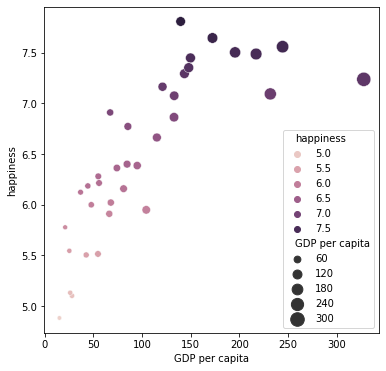

In [8]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x='GDP per capita', y='happiness', data=dane,
                hue='happiness',     
                size='GDP per capita',
                sizes=(20, 200), 
                legend='brief')
plt.show()

Jak w świetle przedstawionych danych oceniasz mądrość ludową *pieniądze szczęścia nie dają*?

**Dopasowanie do danych $\{(x_i,y_i)\}_{i=1}^N$ modelu** liniowego: $$\overline{y} = ax+b,$$
gdzie: <br>
$x$ - PKB na osobę (ang. *GDP per capita*), <br>
$y$ - poczucie szczęścia (ang. *hapiness*), <br>
$\overline{y}$ - przewidywana/wyliczona przez model wartość $y$ dla podanego $x$,<br>
$a, b$ - parametry modelu. <br><br>
Dane pomiarowe zmiennej wyjściowej można zebrać do macierzy:<br>
$Y = \begin{bmatrix} y_1 & y_2 & \cdots & y_N \end{bmatrix}$, <br>
a tak zwane ,,predykcje'' (przybliżenia) modelu do macierzy:<br> 
$\overline{Y} = \begin{bmatrix} \overline{y}_1 & \overline{y}_2 & \cdots & \overline{y}_N \end{bmatrix}$. <br>


Na rozgrzewkę spróbuj **metodą prób i błędów** dobrać wartości parametrów modelu $a$ i $b$ w taki sposób, aby model dobrze reprezentował dane, cokolwiek miałoby to znaczyć. Posłuż się poniższą komórką z kodem. 

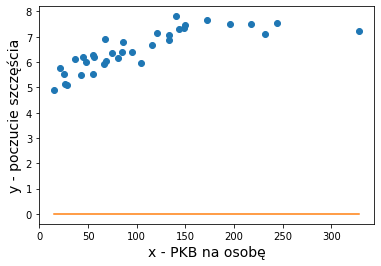

In [9]:
def model(parametry, x):
  a, b = parametry
  return a*x + b

#  w tym miejscu wprowadzasz swoje oszacowania (ang. estimates) wartości parametrów modelu
a_est, b_est = 0, 0

# utwórz wartości x dla całego zakresu zmienności na osi x
X_test = np.linspace(start=X.min(), stop=X.max(), num=300)
# "odpytaj" model dla zakresu osi x objętego pomiarami
Y_pred = model(parametry=[a_est, b_est], x=X_test)    
# w dalszej części będzie to metoda predict z biblioteki sklearn 

plt.scatter(X,Y)
plt.plot(X_test, Y_pred, color='tab:orange')
plt.xlabel('x - PKB na osobę', fontsize=14)
plt.ylabel('y - poczucie szczęścia', fontsize=14)
plt.show()

**Zastanów się**: co to właściwie znaczy, że jakieś zjawisko/proces ma charakter liniowy? Jak rozpoznać, że zjawisko/proces da się skutecznie opisywać modelem liniowym? <br>
Czy zależność między PKB na osobę a poczuciem szczęścia jest liniowa?

**Błąd średniokwadratowy** <br>
Niech błąd przybliżenia dla pojedynczej $i$-tej pary pomiarów wynosi:
$$e_i=y_i-\overline{y_i}.$$
Wybierz jeden z poniższych wzorów jako miarę błędu popełnianego przez model na danych $X,Y$:
\begin{equation}
Q(a,b) = \sum_{i=1}^Ne_i^2 \ ,
\tag{1}
\end{equation}
\begin{equation}
Q(a,b) = \frac{1}{N}\sum_{i=1}^Ne_i^2 \ ,
\tag{2}
\end{equation}
\begin{equation}
Q(a,b) = \frac{1}{N}\sqrt{\sum_{i=1}^Ne_i^2}\ .
\tag{3}
\end{equation}

**Zmodyfikuj** poprzednią komórkę z kodem tak, aby wizualizacja modelu na tle danych była uzupełniona wartością błędu przybliżenia. <br>
Dzięki temu metodę prób i błędów będzie można przeprowadzić bardziej precyzyjnie. <br>
**Zastanów się**: jakie ma znaczenie, które z kryteriów jakości $(1)$, $(2)$, $(3)$ zostało użyte.

Poniżej znajduje się kopia ostatniej komórki. Jedyna różnica jest teraz taka, że trzeba **wyznaczyć parametry modelu sposobem analitycznym** (odpowiednie wzory powinny były pojawić się już na ćwiczeniach z tego kursu. Możesz również dodać wyznaczenie wartości kryterium jakości i porównać uzyskaną wartość z tą, którą udało Ci się osiągnąć metodąprób i błędów. <br>
**Zastanów się**: czy jest możliwe osiągnięcie wyniku lepszego niż zwraca metoda analityczna?

In [10]:
def model(parametry, x):
  a, b = parametry
  return a*x + b

#  w tym miejscu wprowadzasz wzory analityczne
a_est = ...
b_est = ...

# utwórz wartości x dla całego zakresu zmienności na osi x
X_test = np.linspace(start=X.min(), stop=X.max(), num=300)
# "odpytaj" model dla zakresu osi x objętego pomiarami
Y_pred = model(parametry=[a_est, b_est], x=X_test)
# w dalszej części będzie to metoda predict z biblioteki sklearn 

plt.scatter(X,Y)
plt.plot(X_test, Y_pred, color='tab:orange')
plt.xlabel('x - PKB na osobę', fontsize=14)
plt.ylabel('y - poczucie szczęścia', fontsize=14)
plt.show()

TypeError: unsupported operand type(s) for *: 'ellipsis' and 'float'

**Zastosuj** poznany na ćwiczeniach algorytm analityczny do estymacji parametrów modelu liniowego:
\begin{equation}
\widehat{\theta} = (XX^T)^{-1} XY^T, 
\tag{4}
\end{equation}
gdzie $\theta = \begin{bmatrix} a \\ b \end{bmatrix}$. Przemyśl konstrukcję macierzy $X$. Implementacja powinna zająć jedną linijkę kodu.

Algorytm (4) realizowany jest w bibliotece `sklearn` (dalsza częśc notatnika) przez metodę `fit` klasy `LinearRegression`. Parametry $a$ przechowywane są w polu tej klasy o nazwie `coef_` a skalarny parametr swobodny (bo nie związany z żadnym wejściem) $b$ w polu `intercept_`. 

**Uogólniony model liniowy** <br>
Dopasuj do danych model o ogólnej postaci:
\begin{equation}
\overline{y} = \sum_{m=0}^M \theta_m \phi_m(x),
\tag{5}
\end{equation}
gdzie $\theta \in \Re^{M+1}$ to wektor parametrów modelu a $\phi_m$ to tak zwane funkcje bazowe. <br>
Zestaw $M$ funkcji bazowych **dobierz** wedle uznania (możesz zacząć na przykład od jednomianów).<br>
Skomponuj macierze pomiarów $X, Y$ tak, aby dało się wyznaczyć oszacowania $\widehat{\theta}$ ze wzoru (4).

**Przeprowadź eksperyment**. Dopasuj do danych modele o coraz większej wartości $M$. Obserwuj, jak w miarę wzrostu złożoności modelu (rozumianej jako liczba $M$ składających się na niego funkcji bazowych $\phi_m$) zmienia się błąd przybliżenia. <br>
**Zastanów się**: czy najlepszy model to taki, który popełnia najmniejszy błąd na danych, z użyciem których estymowano jego parametry? **Wyciągnij wnioski** praktyczne dotyczące wyboru postaci modelu.

Gdy poznasz procedury optymalizacji numerycznej (zajęcia numer 5), będziesz w stanie dopasowywać do danych modele, które nie dadzą się zapisać jako liniowe względem parametrów.

### Generator sztucznych danych
Metoda najmniejszych kwadratów zasługuje w pełni na swoją nazwę dopiero w warunkach losowych (zmienna wyjściowa $y$ mierzona jest przy obecności zakłóceń). <br>
Poniżej znajduje się kod generatora sztucznych danych, którym można się posłużyć do badania własności samej metody najmniejszych kwadratów. <br>
Generator losuje zestaw $\{x_i\}_{i=1}^N$ z zadanego rozkładu, następnie oblicza ,,idealne'' wartości wyjść z podanego modelu:
$$ \overline{y}_i = F(\theta,x_i)$$ 
o zadanych z góry wartościach parametrów $\theta$. Na koniec dodawane lub wymnażane są zakłocenia $z_i$ o zadanym rozkładzie:  
$$ y_i = \overline{y}_i + z_i$$
lub 
$$ y_i = \overline{y}_i \cdot z_i.$$
Użytkownikowi zwracane są macierze $X, Y$:
$$X = \begin{bmatrix} x_1 & x_2 & \cdots & x_N \end{bmatrix},$$
$$Y = \begin{bmatrix} y_1 & y_2 & \cdots & y_N \end{bmatrix},$$
natomiast macierz 
$$Z = \begin{bmatrix} z_1 & z_2 & \cdots & z_N \end{bmatrix}$$
nie jest zwracana. <br>
Sprawdź z wykładu pojęcie *obiekt w klasie modeli*, aby lepiej zrozumieć zamysł stojący za generatorem.


In [18]:
def generator(rozklad_x, model, rozklad_z, typ_z):
  
  # rozklad_x musi w pełni określać macierz X,
  # model musi mieć określone wartości parametrów, za wejście będzie wstawiana X
  # rozkład_z musi w pełni określać macierz Z
  # typ_z może być 'addytywne' lub 'multiplikatywne'
  
  X = rozklad_x()
  Y_pred = model(X)
  #print(X.shape)
  if typ_z == 'addytywne':
    Y = Y_pred + rozklad_z()
  elif typ_z == 'multiplikatywne':
    Y = Y_pred * rozklad_z()

  return X, Y

Jeżeli nie pamiętasz programowania funkcyjnego, nie przejmuj się kodem generatora. Wystarczy, że będziesz umieć go używać. Poniżej jest przykład, który demonstruje, jak elastyczne są jego parametry wywołania. Wypróbuj go zwłaszcza dla różnych rozkładów dla zmiennej $x$ i zakłóceń $z$. 

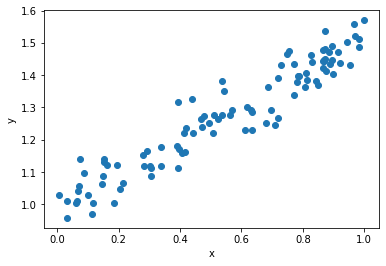

In [19]:
def model(parametry, x):
  a, b = parametry
  return a*x + b

N=100
X, Y = generator(lambda: np.random.uniform(low=0,high=1, size=N), 
                 lambda x: model(parametry=[0.5,1], x=x),
                 lambda: np.random.normal(loc=0,scale=0.05, size=N),
                 typ_z='addytywne')

plt.scatter(X,Y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Zadanie badawcze** <br>
Udajemy, że nie wiemy, z jakimi wartościami parametrów $\theta$ modelu został uruchomiony generator. Wiemy jedynie, że zakłócenia miały rozkład normalny o zerowej wartości oczekiwanej i znamy jego odchylenie standardowe (parametr ```scale``` funkcji ```normal```). <br>
Należy zbadać jak zachowuje się błąd esymacji $\theta - \widehat{\theta}$ w zależności od długości serii pomiarowej $N$ oraz od odchylenia standardowego zakłóceń. Wykonaj odpowiednie symulacje.

### Metody z biblioteki [Scikit-learn](https://scikit-learn.org/stable/)

Metody uczenia maszynowego, czy to do klasyfikacji, regresji, grupowania, czy dopasowywania rozkładów do danych, dostępne w bibliotece Scikit-learn nazywane są - nie wiedzieć czemu - *estymatorami*. <br>
Sposób korzytania z każego estymatora został ujednolicony. Oto przykład regresji liniowej.

1. Importowanie klasy z implementacją *estymatora* 

In [15]:
from sklearn.linear_model import LinearRegression

2. Utworzenie instancji

In [16]:
model_lin = LinearRegression()

3. Dopasowanie *estymatora* do danych metodą ```fit```: patrz komentarz pod algorytmem (4).

In [20]:
model_lin.fit(X.reshape(-1,1), Y)

LinearRegression()

4. Obliczenia/predykcje z wykorzystaniem metody ```predict``` *estymatora*

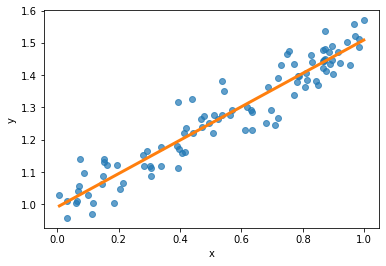

In [21]:
X_test = np.linspace(start=X.min(), stop=X.max(), num=300)
Y_pred = model_lin.predict(X_test.reshape(-1,1))

plt.scatter(X,Y, alpha=0.7)
plt.plot(X_test, Y_pred, color='tab:orange', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Można też sprawdzić wartości parametrów otrzymanego modeli liniowego.

In [22]:
print(f'Parametry modelu liniowego: a = {np.round(model_lin.coef_,5)}, b = {np.round(model_lin.intercept_,5)}')

Parametry modelu liniowego: a = [0.51787], b = 0.99161


Oto inne ważne czynności, które wykonuje się w ramach dopasowywania modelu do danych.

Podział zbioru na część do trenowania i testowania

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

Wskaźnik jakości modelu

In [24]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y, model_lin.predict(X.reshape(-1,1)))

0.0024112724797322716

Oto **przykład** demonstrujący jednolitość obsługi *estymatorów* biblioteki Scikit-learn

Parametry modelu liniowego: [0.00807], 5.61926
Błąd średniokwadratowy modelu liniowego: 0.272

Parametry modelu GLM: [ 0.      0.0214 -0.    ], 4.98415
Błąd średniokwadratowy modelu GLM: 0.107

Błąd średniokwadratowy modelu SVR: 0.163


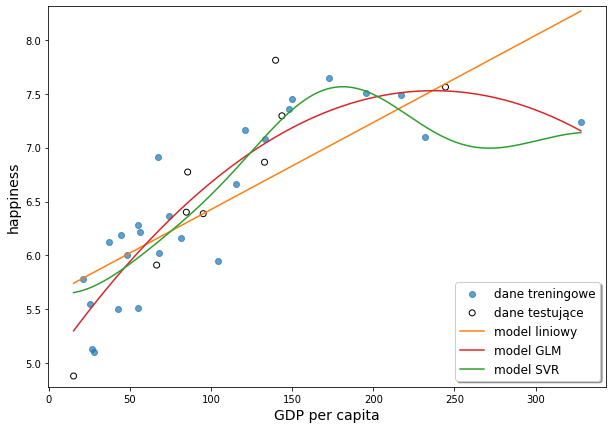

In [25]:
X = dane['GDP per capita'].values
Y = dane['happiness'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)


# =========  Model liniowy =========
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X_train.reshape(-1,1), 
              Y_train)
print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
MSE_lin = mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')

# ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), 
              Y_train)
print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1))))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

#==== Maszyna wektorów wspierających (ang. Support Vector Machine) ====
# SVR dla regresji, SVC dla kalsyfikacji
from sklearn.svm import SVR
model_svr = SVR(kernel='rbf', gamma='scale', C=1)
model_svr.fit(X_train.reshape(-1,1), 
              Y_train)
MSE_SVR = mean_squared_error(Y_test, model_svr.predict(X_test.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu SVR: {MSE_SVR:0.3}')

# Predykcje wszystkich modeli dla całego zakreso osi X
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
y_lin_pred = model_lin.predict(os_x.reshape(-1,1))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))
y_svr_pred = model_svr.predict(os_x.reshape(-1,1))

# Wizualizacja
plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, label='dane treningowe', alpha=0.7)
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
plt.plot(os_x, y_svr_pred, label='model SVR', color='tab:green')
plt.xlabel(dane.columns[0], fontsize=14)
plt.ylabel(dane.columns[1], fontsize=14)
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y.min()-0.1, Y.max()+0.5])
plt.show()

**Zastanów się** <br>
Wykonaj wielokrotne dopasowania modeli do różnych podziałów zbioru danych na część do trenowania i do testowania. Wyciągnij wnioski. <br>
Jak oceniasz adekwatność każdego z modeli, tzn. czy poprawnie opisuje tendencje obserwowane w danych? <br>
Jaki kolejny model proponujesz rozważyć? <br>
Jak można ocenić adekwatność modelu w przypadku danych wielowymiarowych?